In [19]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### Data Reading

In [20]:
dfs = []
for file in os.listdir("./data/"):
    print(f'reading of {file}...')
    df = pd.read_csv(f"./data/{file}")
    dfs.append(df)
    
all_data_df = pd.concat(dfs, axis=0, ignore_index=True)
all_data_df

reading of saveecobot_12921.csv...
reading of saveecobot_20585.csv...
reading of saveecobot_20614.csv...


,device_id,phenomenon,value,logged_at,value_text
0,12921,pm1,2.3750,2020-09-14 15:41:48,NaN
1,12921,pm25,3.5625,2020-09-14 15:41:48,NaN
2,12921,pm10,2.6250,2020-09-14 15:41:48,NaN
3,12921,temperature,25.4821,2020-09-14 15:41:48,NaN
4,12921,humidity,73.4259,2020-09-14 15:41:48,NaN
...,...,...,...,...,...
2950043,20614,aqi,19.0000,2022-10-12 21:00:00,NaN
2950044,20614,pm25,4.6000,2022-10-12 21:00:00,NaN
2950045,20614,temperature,9.0000,2022-10-12 21:00:00,NaN
2950046,20614,humidity,76.0000,2022-10-12 21:00:00,NaN


#### data analisys

In [21]:
print(f'dataset shape: {all_data_df.shape}\n')
print(f'columns amount: {len(all_data_df.columns)}\n')
print('columns:\n', all_data_df.dtypes, '\n')
print(f'not null rows amount:\n {all_data_df.count()}\n')
#get amount of unique values for each column
for col in all_data_df.columns:
    print(f"unique values in column {col} -- {len(all_data_df[col].unique())}")

dataset shape: (2950048, 5)

columns amount: 5

columns:
 device_id       int64
phenomenon     object
value         float64
logged_at      object
value_text    float64
dtype: object 

not null rows amount:
 device_id     2950048
phenomenon    2950048
value         2950048
logged_at     2950048
value_text          0
dtype: int64

unique values in column device_id -- 3
unique values in column phenomenon -- 7
unique values in column value -- 852613
unique values in column logged_at -- 487619
unique values in column value_text -- 1


#### data preparation

In [22]:
all_data_df.drop("value_text", axis=1, inplace=True)

# get week day fol each record
all_data_df["logged_at"] = pd.to_datetime(all_data_df["logged_at"], format='%Y/%m/%d %H:%M:%S' )
all_data_df["day_of_week"] = all_data_df.logged_at.dt.dayofweek
all_data_df

,device_id,phenomenon,value,logged_at,day_of_week
0,12921,pm1,2.3750,2020-09-14 15:41:48,0
1,12921,pm25,3.5625,2020-09-14 15:41:48,0
2,12921,pm10,2.6250,2020-09-14 15:41:48,0
3,12921,temperature,25.4821,2020-09-14 15:41:48,0
4,12921,humidity,73.4259,2020-09-14 15:41:48,0
...,...,...,...,...,...
2950043,20614,aqi,19.0000,2022-10-12 21:00:00,2
2950044,20614,pm25,4.6000,2022-10-12 21:00:00,2
2950045,20614,temperature,9.0000,2022-10-12 21:00:00,2
2950046,20614,humidity,76.0000,2022-10-12 21:00:00,2


In [23]:
#get day time fol each record
all_data_df.loc[
    (all_data_df['logged_at'].dt.hour > 4) 
    & (all_data_df['logged_at'].dt.hour <= 10),
    'time_of_day'] = 'morning'
all_data_df.loc[
    (all_data_df['logged_at'].dt.hour > 10) 
    & (all_data_df['logged_at'].dt.hour <= 16),
    'time_of_day'] = 'afternoon'

all_data_df.loc[
    (all_data_df['logged_at'].dt.hour > 16) 
    & (all_data_df['logged_at'].dt.hour <= 22),
    'time_of_day'] = 'evening'

all_data_df.loc[
    (all_data_df['logged_at'].dt.hour > 22)  
    & (all_data_df['logged_at'].dt.hour <= 23) 
    | (all_data_df['logged_at'].dt.hour >= 0)  
    & (all_data_df['logged_at'].dt.hour <= 4),
    'time_of_day'] = 'night'

all_data_df

,device_id,phenomenon,value,logged_at,day_of_week,time_of_day
0,12921,pm1,2.3750,2020-09-14 15:41:48,0,afternoon
1,12921,pm25,3.5625,2020-09-14 15:41:48,0,afternoon
2,12921,pm10,2.6250,2020-09-14 15:41:48,0,afternoon
3,12921,temperature,25.4821,2020-09-14 15:41:48,0,afternoon
4,12921,humidity,73.4259,2020-09-14 15:41:48,0,afternoon
...,...,...,...,...,...,...
2950043,20614,aqi,19.0000,2022-10-12 21:00:00,2,evening
2950044,20614,pm25,4.6000,2022-10-12 21:00:00,2,evening
2950045,20614,temperature,9.0000,2022-10-12 21:00:00,2,evening
2950046,20614,humidity,76.0000,2022-10-12 21:00:00,2,evening


In [24]:
# categorize phenomenon
all_data_df['phenomenon_cat'] = all_data_df.phenomenon.astype("category").cat.codes
all_data_df['time_of_day_cat'] = all_data_df.time_of_day.astype("category").cat.codes
all_data_df

,device_id,phenomenon,value,logged_at,day_of_week,time_of_day,phenomenon_cat,time_of_day_cat
0,12921,pm1,2.3750,2020-09-14 15:41:48,0,afternoon,2,0
1,12921,pm25,3.5625,2020-09-14 15:41:48,0,afternoon,4,0
2,12921,pm10,2.6250,2020-09-14 15:41:48,0,afternoon,3,0
3,12921,temperature,25.4821,2020-09-14 15:41:48,0,afternoon,6,0
4,12921,humidity,73.4259,2020-09-14 15:41:48,0,afternoon,1,0
...,...,...,...,...,...,...,...,...
2950043,20614,aqi,19.0000,2022-10-12 21:00:00,2,evening,0,1
2950044,20614,pm25,4.6000,2022-10-12 21:00:00,2,evening,4,1
2950045,20614,temperature,9.0000,2022-10-12 21:00:00,2,evening,6,1
2950046,20614,humidity,76.0000,2022-10-12 21:00:00,2,evening,1,1


In [25]:
#get a subsets for histogram creation
phenomenon_weekday_df = all_data_df[['phenomenon', 'value', 'day_of_week']].iloc[:100000,:]
phenomenon_daytime_df = all_data_df[['phenomenon', 'value', 'time_of_day']].iloc[:100000,:]

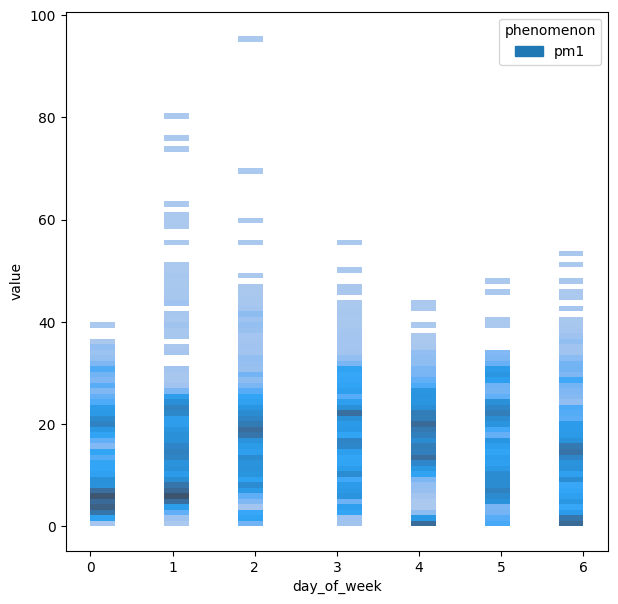

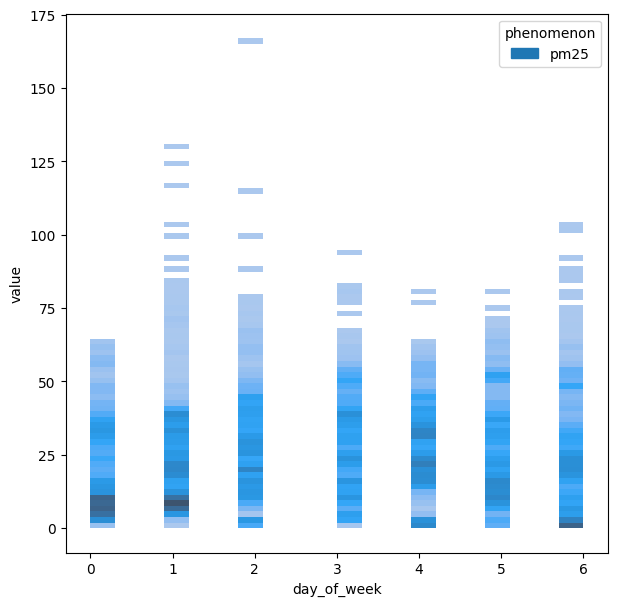

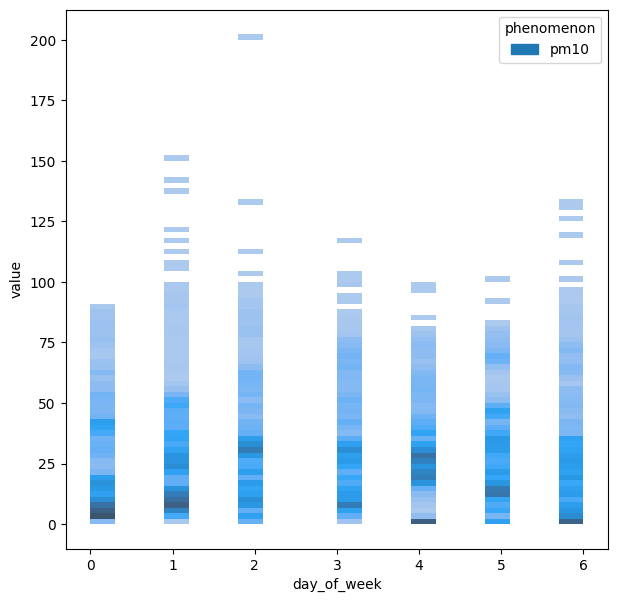

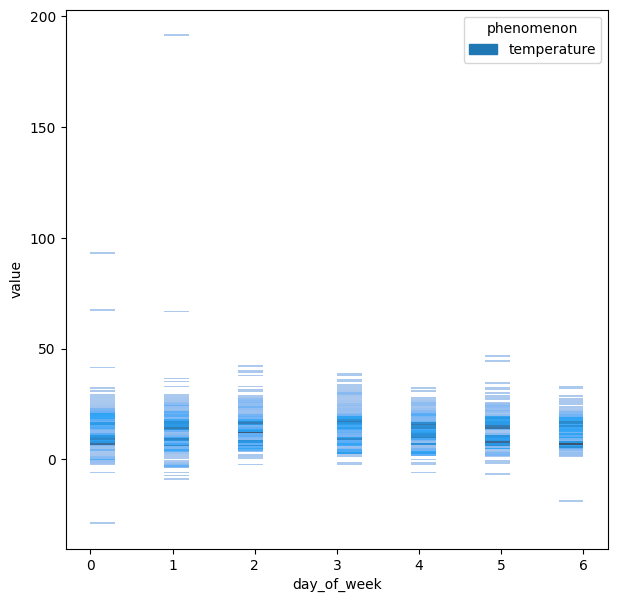

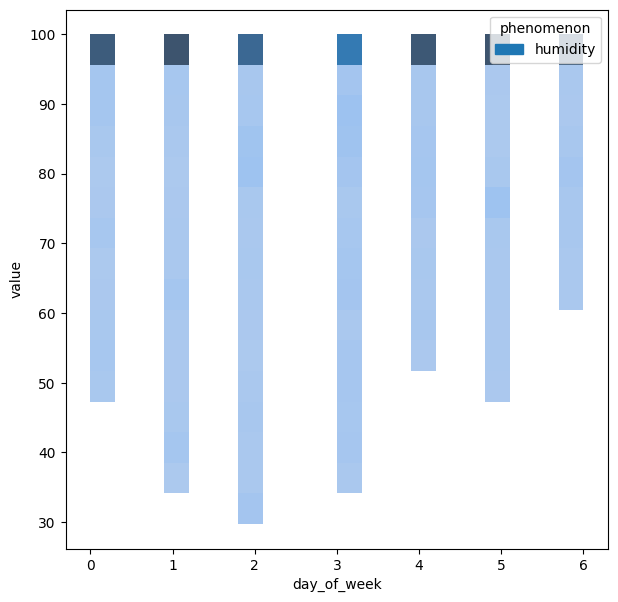

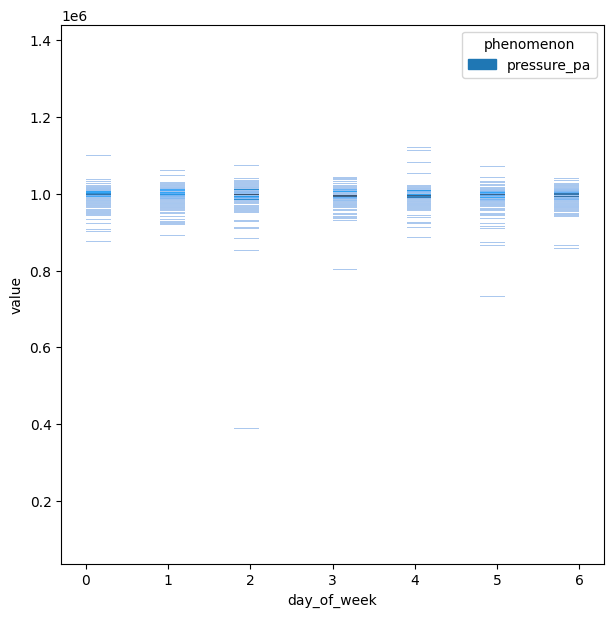

In [26]:
for phen in all_data_df.phenomenon.unique():
    if(phen != 'aqi'):
        pylab.figure(figsize=(7,7))
        sns.histplot(phenomenon_weekday_df[phenomenon_weekday_df.phenomenon==phen], x='day_of_week', y='value', hue='phenomenon')

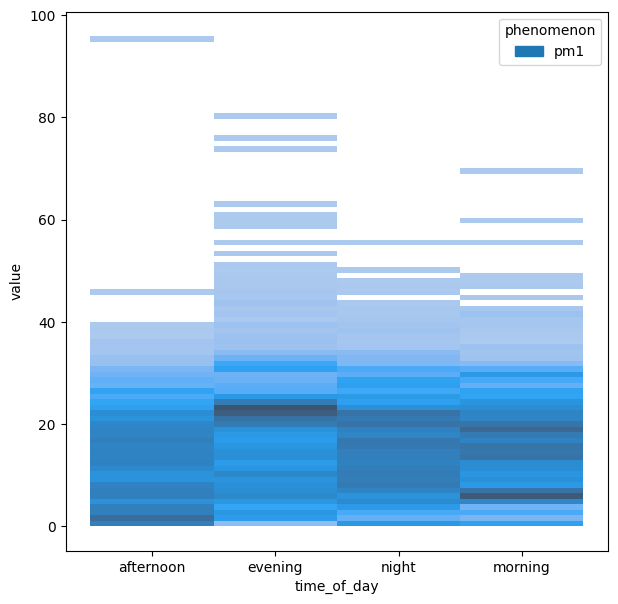

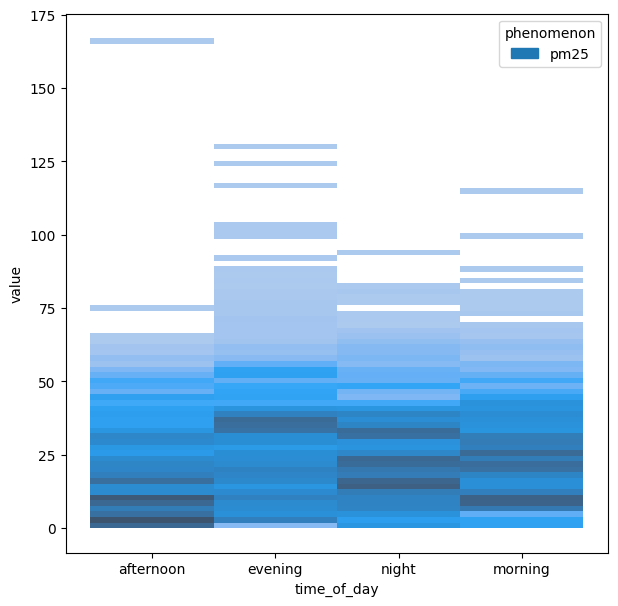

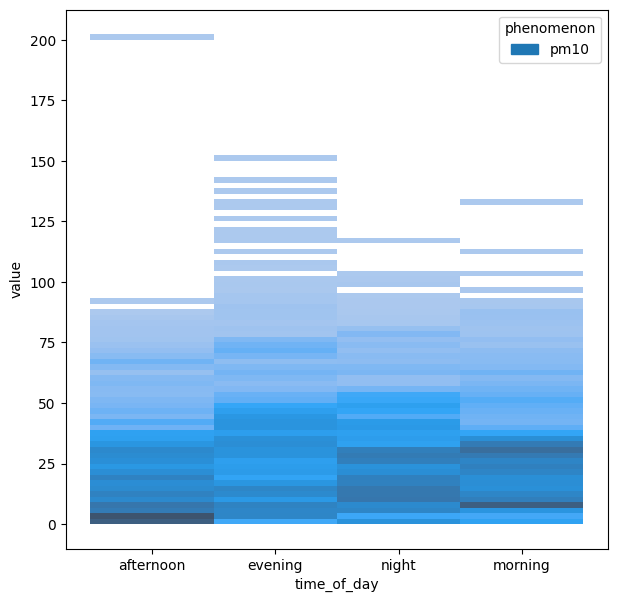

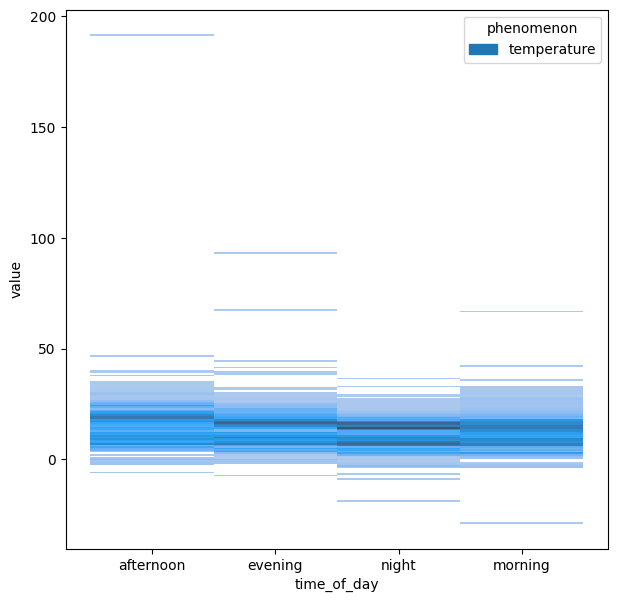

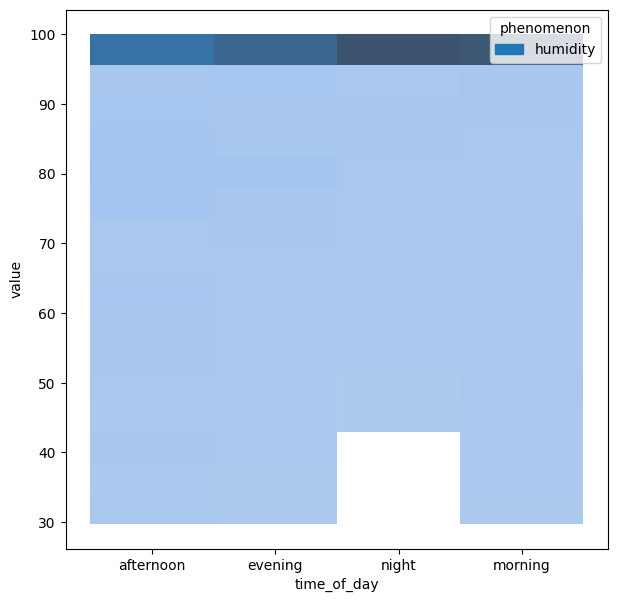

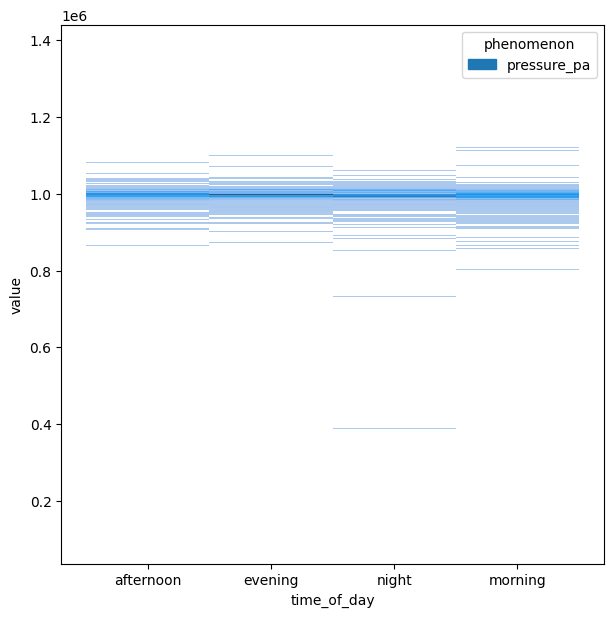

In [27]:
for phen in all_data_df.phenomenon.unique():
    if(phen != 'aqi'):
        pylab.figure(figsize=(7,7))
        sns.histplot(phenomenon_daytime_df[phenomenon_daytime_df.phenomenon==phen], x='time_of_day', y='value', hue='phenomenon')

In [28]:
# get mean values per 'phenomenon' per 'logged_at' and create a pivot table
feature_df = all_data_df.groupby(['phenomenon', 'logged_at'], as_index=False).aggregate('mean')
phenomenon_time_df = feature_df.pivot_table(index=['logged_at', 'day_of_week', 'time_of_day_cat'], columns='phenomenon', values=['value',])
phenomenon_time_df.reset_index(inplace=True)
phenomenon_time_df.columns = [col[1] if col[1]!='' else col[0] for col in phenomenon_time_df.columns.values]
print('Columns:  ', phenomenon_time_df.columns)
phenomenon_time_df

C:\Users\Lollo\AppData\Local\Temp\ipykernel_5112\1115287565.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  feature_df = all_data_df.groupby(['phenomenon', 'logged_at'], as_index=False).aggregate('mean')


Columns:   Index(['logged_at', 'day_of_week', 'time_of_day_cat', 'aqi', 'humidity', 'pm1',
       'pm10', 'pm25', 'pressure_pa', 'temperature'],
      dtype='object')


,logged_at,day_of_week,time_of_day_cat,aqi,humidity,pm1,pm10,pm25,pressure_pa,temperature
0,2020-09-14 15:41:48,0.0,0.0,NaN,73.4259,2.3750,2.6250,3.5625,1.008364e+05,25.4821
1,2020-09-14 15:45:05,0.0,0.0,NaN,72.1887,2.1500,2.9500,5.3000,1.003555e+05,22.3447
2,2020-09-14 15:45:18,0.0,0.0,NaN,72.1887,2.1500,2.9500,5.3000,1.003555e+05,22.3447
3,2020-09-14 15:47:29,0.0,0.0,NaN,73.5209,2.4545,2.9091,3.9545,1.003564e+05,22.1890
4,2020-09-14 15:50:32,0.0,0.0,NaN,72.2516,1.3333,1.3333,3.0000,1.003599e+06,22.7042
...,...,...,...,...,...,...,...,...,...,...
487614,2022-10-12 22:50:00,2.0,1.0,NaN,100.0000,9.8860,14.2350,11.8350,1.003757e+06,5.9380
487615,2022-10-12 22:51:00,2.0,1.0,NaN,100.0000,9.8270,13.6230,11.6160,1.003759e+06,5.9140
487616,2022-10-12 22:52:00,2.0,1.0,NaN,100.0000,9.4660,12.4890,11.5010,1.003775e+06,5.9000
487617,2022-10-12 22:53:00,2.0,1.0,NaN,100.0000,9.5010,12.0090,11.0810,1.003763e+06,5.8890


In [29]:
corr_matrix = phenomenon_time_df.corr().abs()
corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False)
      )[:3]
print(corr)
corr_items = list(corr.index)

pm1   pm25    0.986430
pm10  pm25    0.981624
pm1   pm10    0.959722
dtype: float64


C:\Users\Lollo\AppData\Local\Temp\ipykernel_5112\792457308.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = phenomenon_time_df.corr().abs()


#### Selecting features and model creation

In [30]:
#drop aqi because it is Nan almost everywhere
phenomenon_time_df.drop('aqi', axis=1, inplace=True)
phenomenon_time_df.dropna(inplace=True)
print(len(phenomenon_time_df))

#split data for train and test
train, test = train_test_split(phenomenon_time_df, test_size=0.25, random_state=0)
print(f"train samples: {len(train)},  test samples {len(test)}")

483318
train samples: 362488,  test samples 120830


feature pm1,  target: pm25
r2_score   0.28774987336448554
RMSE   52.36884762662069 




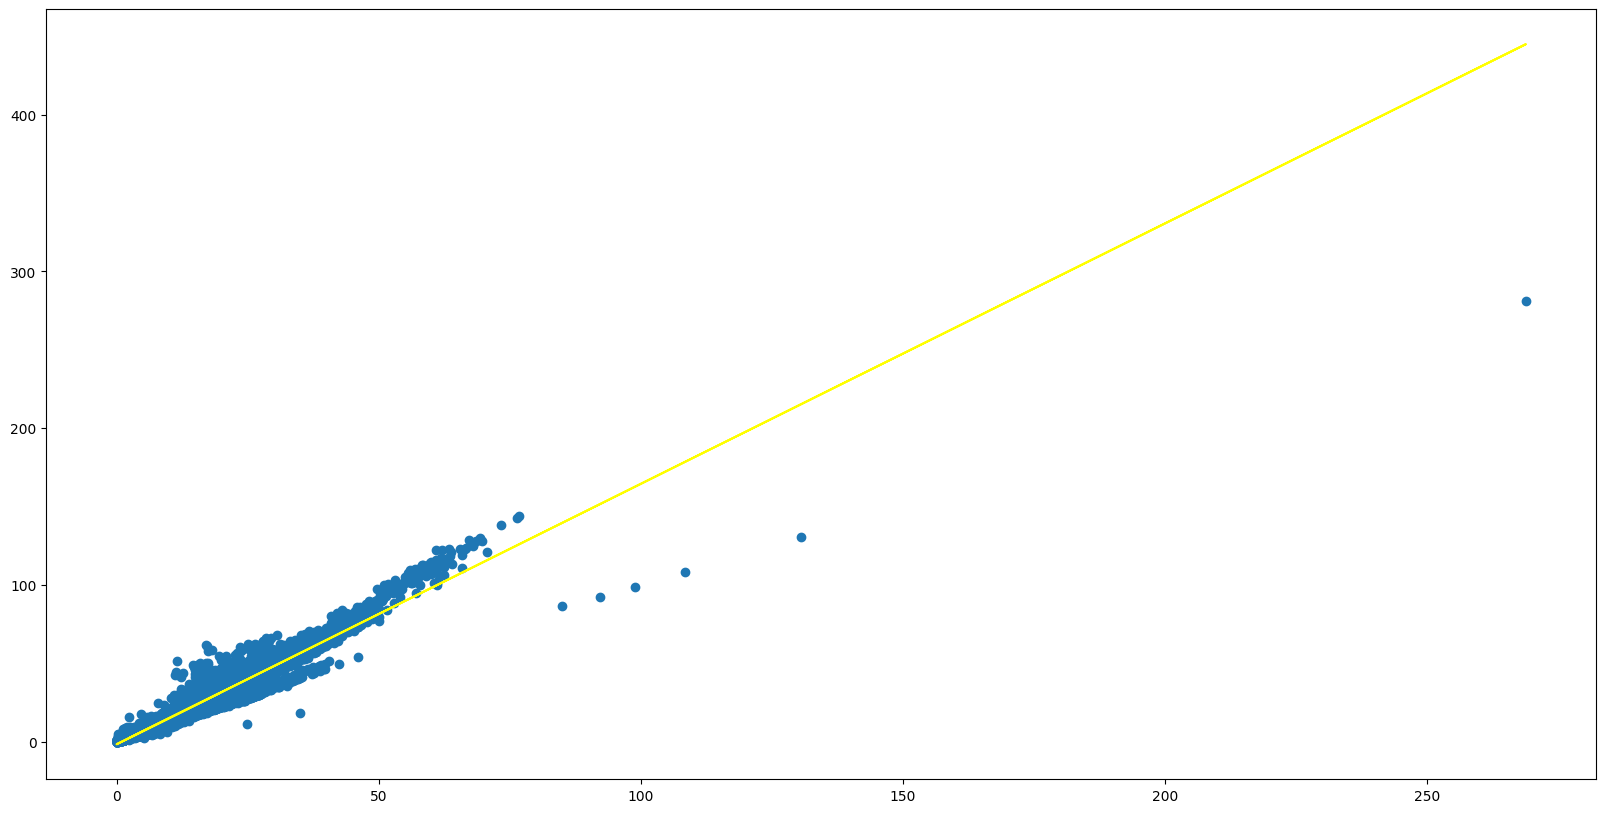

feature pm10,  target: pm25
r2_score   0.8981031531758744
RMSE   33.65247753974884 




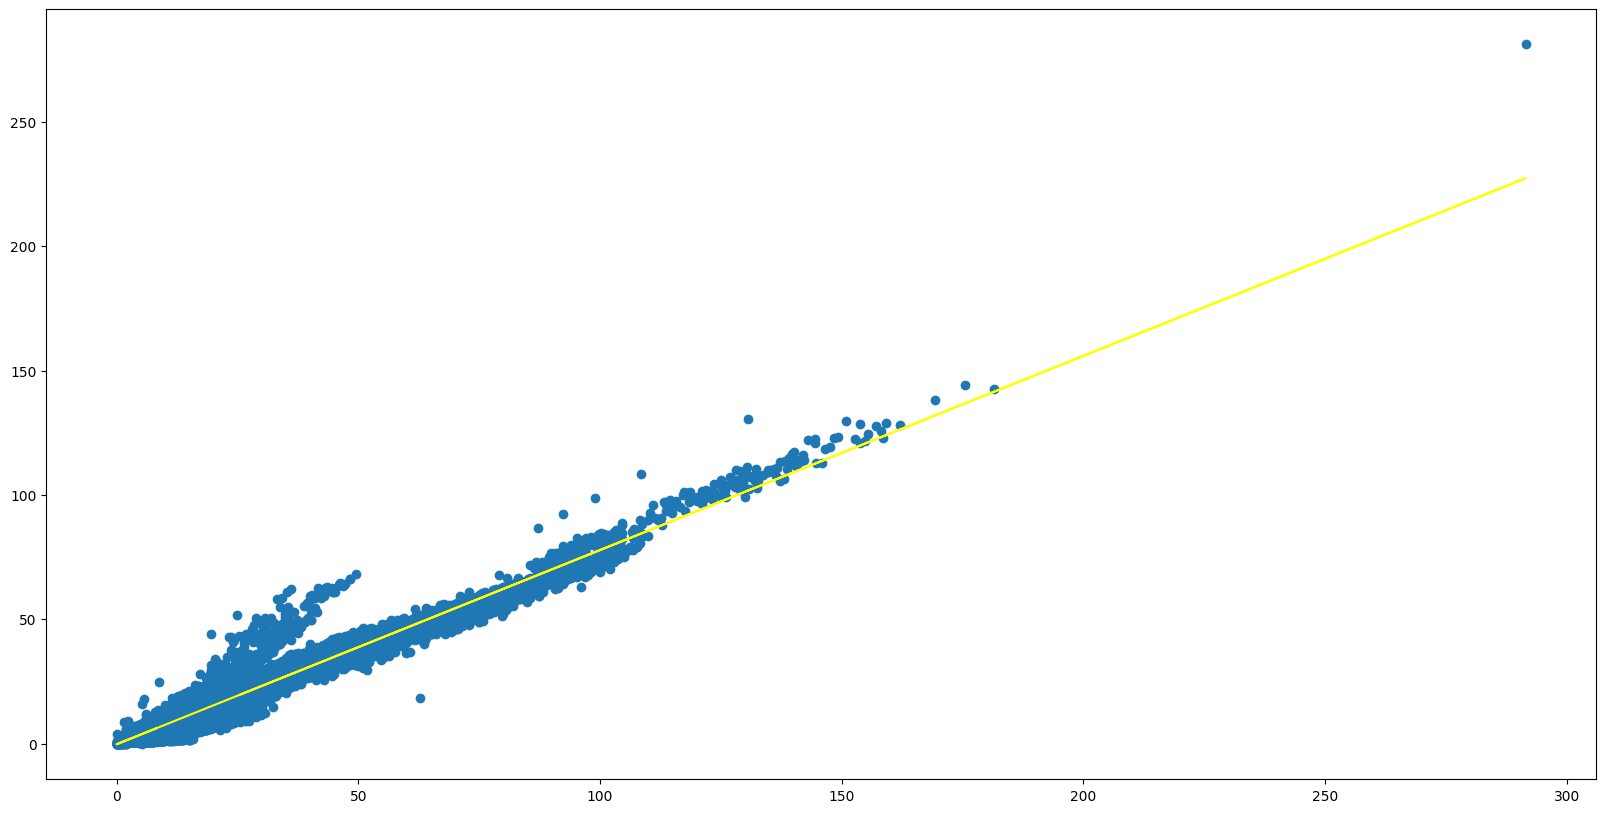

feature pm1,  target: pm10
r2_score   -1.0957663817355554
RMSE   154.09315660573859 




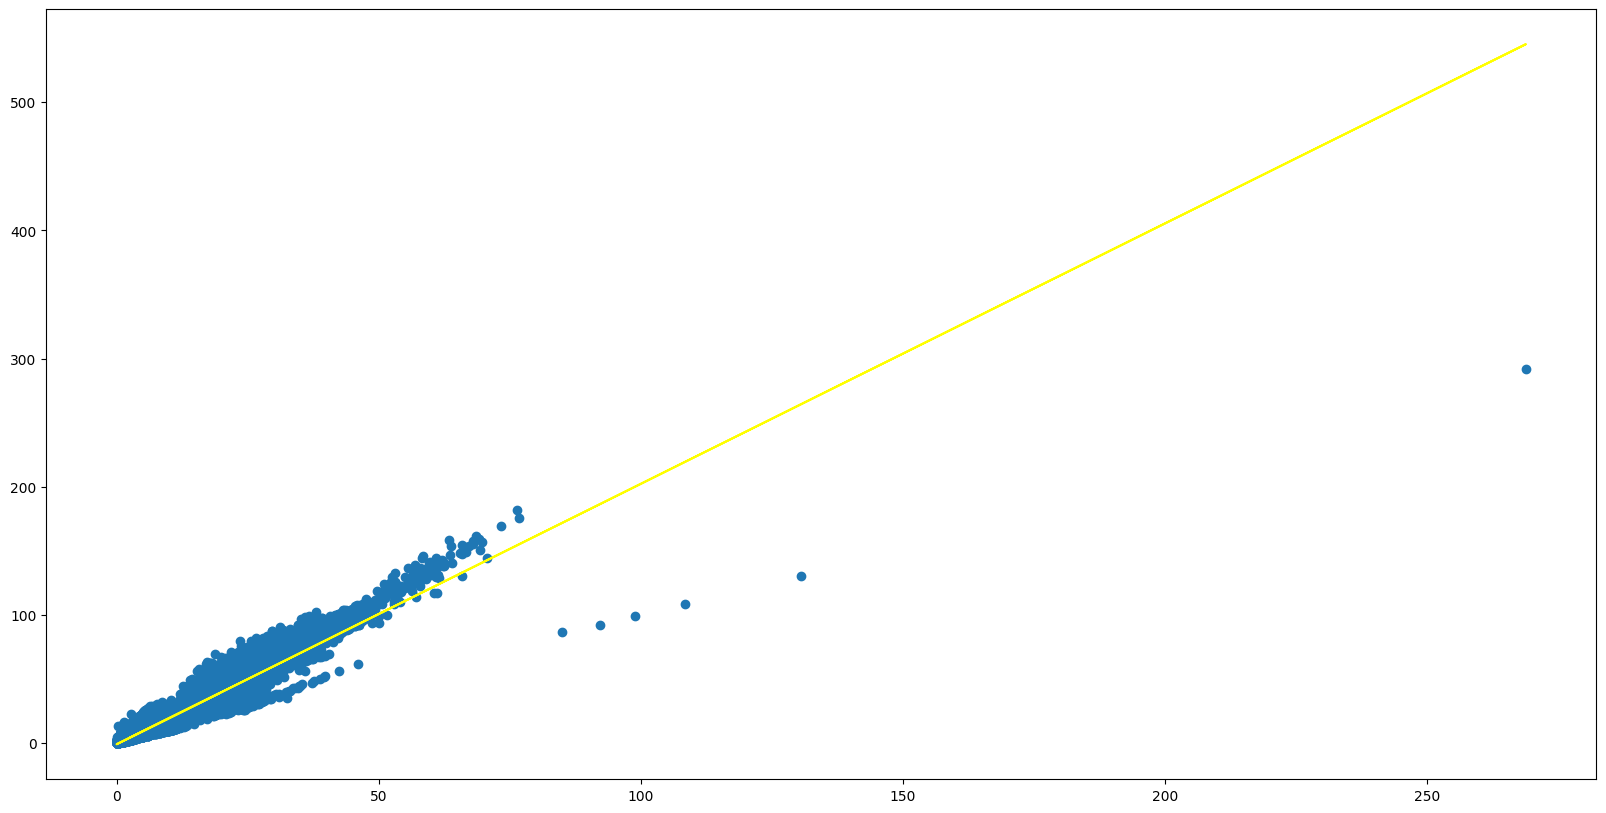

In [31]:
for corr_i in corr_items:
    X = train[[corr_i[0]]]
    Y = train[[corr_i[1]]]
    model = LinearRegression()
    model.fit(X, Y)
    results = model.predict(test[[corr_i[0]]])
    print(f"feature {corr_i[0]},  target: {corr_i[1]}")
    print(f"r2_score  ", r2_score(test[[corr_i[0]]], results))
    print(f"RMSE  ", mean_squared_error(test[[corr_i[0]]], results, squared=True), '\n\n')
    
    fig = plt.figure()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    plt.scatter(test[[corr_i[0]]], test[[corr_i[1]]])
    plt.plot(test[[corr_i[0]]], results, color='yellow')
    plt.show()

#### Get scores for all phenomenons

In [32]:
def get_features_and_run_model(train_data, test_data, X_set, Y_set):
    for feature in X_set:
        for target in Y_set:
            if feature == target:
                continue
            X = train_data[[feature]]
            Y = train_data[[target]]
            model = LinearRegression()
            model.fit(X, Y)
            results = model.predict(test_data[[feature]])
            
            print(f"feature {feature},  target: {target}")
            print(f"r2_score  ", r2_score(test_data[[target]], results))
            print(f"RMSE  ", mean_squared_error(test_data[[target]], results, squared=True), '\n\n')

In [33]:
get_features_and_run_model(
    train, 
    test, 
    ['humidity', 'pm1', 'pm10', 'pm25', 'pressure_pa', 'temperature'], 
    ['time_of_day_cat'] 
)

feature humidity,  target: time_of_day_cat
r2_score   0.09397357335439727
RMSE   1.1307110017874669 


feature pm1,  target: time_of_day_cat
r2_score   0.004700538126381937
RMSE   1.2421227665292482 


feature pm10,  target: time_of_day_cat
r2_score   0.0021309801776744353
RMSE   1.245329546549 


feature pm25,  target: time_of_day_cat
r2_score   0.0040805510589061456
RMSE   1.242896503561132 


feature pressure_pa,  target: time_of_day_cat
r2_score   5.133369256338227e-06
RMSE   1.2479825799525537 


feature temperature,  target: time_of_day_cat
r2_score   0.017806635362506262
RMSE   1.225766501524653 




In [34]:
get_features_and_run_model(
    train,
    test,
    ['humidity', 'pm1', 'pm10', 'pm25', 'pressure_pa', 'temperature'],
    ['day_of_week']
)

feature humidity,  target: day_of_week
r2_score   0.0003920498287666163
RMSE   4.012595777250869 


feature pm1,  target: day_of_week
r2_score   0.00016215383243523007
RMSE   4.013518618754809 


feature pm10,  target: day_of_week
r2_score   0.0001261737669231433
RMSE   4.013663048837537 


feature pm25,  target: day_of_week
r2_score   6.096448940462462e-05
RMSE   4.013924809932538 


feature pressure_pa,  target: day_of_week
r2_score   6.114050257466364e-05
RMSE   4.0139241033858335 


feature temperature,  target: day_of_week
r2_score   0.0005199278808153407
RMSE   4.012082453070558 




In [35]:
get_features_and_run_model(
    train,
    test, 
    ['humidity', 'pm1', 'pm10', 'pm25', 'pressure_pa', 'temperature'],
    ['humidity', 'pm1', 'pm10', 'pm25', 'pressure_pa', 'temperature']
)

feature humidity,  target: pm1
r2_score   0.07297447947136604
RMSE   68.16040659743716 


feature humidity,  target: pm10
r2_score   0.035080676024975666
RMSE   318.67449180037755 


feature humidity,  target: pm25
r2_score   0.06862956452570645
RMSE   194.16301806981508 


feature humidity,  target: pressure_pa
r2_score   -2.657667631522642e-06
RMSE   1969021322.2103398 


feature humidity,  target: temperature
r2_score   0.3404799807469252
RMSE   85.39131720077049 


feature pm1,  target: humidity
r2_score   0.07298512922898603
RMSE   415.5938418153269 


feature pm1,  target: pm10
r2_score   0.9218399095645413
RMSE   25.81317057262712 


feature pm1,  target: pm25
r2_score   0.9731753597751335
RMSE   5.592139181489842 


feature pm1,  target: pressure_pa
r2_score   0.005745803973286834
RMSE   1957702508.7511075 


feature pm1,  target: temperature
r2_score   0.08090431501810891
RMSE   118.99986184351476 


feature pm10,  target: humidity
r2_score   0.03509677006283807
RMSE   432.579